In [46]:
import pandas as pd

In [47]:
df = pd.read_csv('laptop_price.csv', encoding='latin-1')

In [48]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [49]:
df.Product.value_counts()

Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: count, Length: 618, dtype: int64

In [50]:
df.TypeName.value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [51]:
df = df.drop("Product", axis=1)

In [52]:
df = df.join(pd.get_dummies(df.Company))
df = df.drop("Company", axis=1)

In [53]:
df.head()

,laptop_ID,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,1,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,False,False,False,False,False,False,False,False,False,False
1,2,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,False,False,False,False,False,False,False,False,False,False
2,3,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,False,False,False,False,False,False,False,False,False,False
3,4,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,False,False,False,False,False,False,False,False,False,False
4,5,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,False,False,False,False,False,False,False,False,False,False


In [54]:
df = df.join(pd.get_dummies(df.TypeName))

In [55]:
df = df.drop("TypeName", axis=1)

In [56]:
df.head()

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,False,False,False,False,False,False,False,False,True,False
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,False,False,False,False,False,False,False,False,True,False
2,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,False,False,False,False,False,False,False,True,False,False
3,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,False,False,False,False,False,False,False,False,True,False
4,5,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,False,False,False,False,False,False,False,False,True,False


In [57]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])

In [58]:
df.head()

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height
0,1,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,False,False,False,False,False,False,True,False,2560,1600
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,False,False,False,False,False,False,True,False,1440,900
2,3,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,False,False,False,False,False,True,False,False,1920,1080
3,4,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,False,False,False,False,False,False,True,False,2880,1800
4,5,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,False,False,False,False,False,False,True,False,2560,1600


In [59]:
df = df.drop("ScreenResolution", axis=1)

In [60]:
df.head()

,laptop_ID,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,...,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height
0,1,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,False,...,False,False,False,False,False,False,True,False,2560,1600
1,2,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,False,...,False,False,False,False,False,False,True,False,1440,900
2,3,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,False,...,False,False,False,False,False,True,False,False,1920,1080
3,4,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,False,...,False,False,False,False,False,False,True,False,2880,1800
4,5,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,False,...,False,False,False,False,False,False,True,False,2560,1600


In [61]:
df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])

In [62]:
df = df.drop("Cpu", axis=1)

In [63]:
df.head()

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand,CPU Frequency
0,1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,False,True,...,False,False,False,False,True,False,2560,1600,Intel,2.3GHz
1,2,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,False,True,...,False,False,False,False,True,False,1440,900,Intel,1.8GHz
2,3,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,False,False,...,False,False,False,True,False,False,1920,1080,Intel,2.5GHz
3,4,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,False,True,...,False,False,False,False,True,False,2880,1800,Intel,2.7GHz
4,5,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,False,True,...,False,False,False,False,True,False,2560,1600,Intel,3.1GHz


In [64]:
df["CPU Frequency"] = df["CPU Frequency"].str[:-3]

In [65]:
df.head()

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand,CPU Frequency
0,1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,False,True,...,False,False,False,False,True,False,2560,1600,Intel,2.3
1,2,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,False,True,...,False,False,False,False,True,False,1440,900,Intel,1.8
2,3,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,False,False,...,False,False,False,True,False,False,1920,1080,Intel,2.5
3,4,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,False,True,...,False,False,False,False,True,False,2880,1800,Intel,2.7
4,5,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,False,True,...,False,False,False,False,True,False,2560,1600,Intel,3.1


In [66]:
df["Ram"] = df["Ram"].str[:-2]

In [67]:
df.head()

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand,CPU Frequency
0,1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,False,True,...,False,False,False,False,True,False,2560,1600,Intel,2.3
1,2,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,False,True,...,False,False,False,False,True,False,1440,900,Intel,1.8
2,3,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,False,False,...,False,False,False,True,False,False,1920,1080,Intel,2.5
3,4,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,False,True,...,False,False,False,False,True,False,2880,1800,Intel,2.7
4,5,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,False,True,...,False,False,False,False,True,False,2560,1600,Intel,3.1


In [70]:
df["Ram"] = df["Ram"].astype("int")
df["CPU Frequency"] = df["CPU Frequency"].astype("float")
df["Screen Height"] = df["Screen Height"].astype("int")
df["Screen Width"] = df["Screen Width"].astype("int")

In [72]:
df["Memory Amount"] = df.Memory.str.split(" ").apply(lambda x:x[0])
df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x:x[1])

In [73]:
df["Memory Type"].value_counts()

Memory Type
SSD       843
HDD       375
Flash      75
Hybrid     10
Name: count, dtype: int64

In [79]:
df["Memory Amount"].value_counts()

Memory Amount
256GB    508
1TB      240
128GB    177
512GB    140
500GB    132
32GB      45
64GB      17
2TB       16
1.0TB     10
16GB      10
180GB      5
240GB      1
8GB        1
508GB      1
Name: count, dtype: int64

In [80]:
def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [78]:
df.head()

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand,CPU Frequency,Memory Amount,Memory Type
0,1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,False,True,...,False,False,True,False,2560,1600,Intel,2.3,128GB,SSD
1,2,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,False,True,...,False,False,True,False,1440,900,Intel,1.8,128GB,Flash
2,3,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,False,False,...,False,True,False,False,1920,1080,Intel,2.5,256GB,SSD
3,4,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,False,True,...,False,False,True,False,2880,1800,Intel,2.7,512GB,SSD
4,5,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,False,True,...,False,False,True,False,2560,1600,Intel,3.1,256GB,SSD


In [81]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_MB)

In [83]:
df= df.drop("Memory", axis =1)

In [84]:
df.head()

,laptop_ID,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,...,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand,CPU Frequency,Memory Amount,Memory Type
0,1,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,False,True,False,...,False,False,True,False,2560,1600,Intel,2.3,128000.0,SSD
1,2,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,False,True,False,...,False,False,True,False,1440,900,Intel,1.8,128000.0,Flash
2,3,15.6,8,Intel HD Graphics 620,No OS,1.86kg,575.00,False,False,False,...,False,True,False,False,1920,1080,Intel,2.5,256000.0,SSD
3,4,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,False,True,False,...,False,False,True,False,2880,1800,Intel,2.7,512000.0,SSD
4,5,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,False,True,False,...,False,False,True,False,2560,1600,Intel,3.1,256000.0,SSD


In [86]:
df["Weight"] = df["Weight"].str[:-2]

In [88]:
df["Weight"] = df["Weight"].astype("float")

In [90]:
df.head()

,laptop_ID,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,...,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand,CPU Frequency,Memory Amount,Memory Type
0,1,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,False,True,False,...,False,False,True,False,2560,1600,Intel,2.3,128000.0,SSD
1,2,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,False,True,False,...,False,False,True,False,1440,900,Intel,1.8,128000.0,Flash
2,3,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,False,False,False,...,False,True,False,False,1920,1080,Intel,2.5,256000.0,SSD
3,4,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,False,True,False,...,False,False,True,False,2880,1800,Intel,2.7,512000.0,SSD
4,5,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,False,True,False,...,False,False,True,False,2560,1600,Intel,3.1,256000.0,SSD


In [92]:
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x:x[0])

In [93]:
df = df.drop("Gpu", axis=1)

In [94]:
df

,laptop_ID,Inches,Ram,OpSys,Weight,Price_euros,Acer,Apple,Asus,Chuwi,...,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand,CPU Frequency,Memory Amount,Memory Type,GPU Brand
0,1,13.3,8,macOS,1.37,1339.69,False,True,False,False,...,False,True,False,2560,1600,Intel,2.3,128000.0,SSD,Intel
1,2,13.3,8,macOS,1.34,898.94,False,True,False,False,...,False,True,False,1440,900,Intel,1.8,128000.0,Flash,Intel
2,3,15.6,8,No OS,1.86,575.00,False,False,False,False,...,True,False,False,1920,1080,Intel,2.5,256000.0,SSD,Intel
3,4,15.4,16,macOS,1.83,2537.45,False,True,False,False,...,False,True,False,2880,1800,Intel,2.7,512000.0,SSD,AMD
4,5,13.3,8,macOS,1.37,1803.60,False,True,False,False,...,False,True,False,2560,1600,Intel,3.1,256000.0,SSD,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,Windows 10,1.80,638.00,False,False,False,False,...,False,False,False,1920,1080,Intel,2.5,128000.0,SSD,Intel
1299,1317,13.3,16,Windows 10,1.30,1499.00,False,False,False,False,...,False,False,False,3200,1800,Intel,2.5,512000.0,SSD,Intel
1300,1318,14.0,2,Windows 10,1.50,229.00,False,False,False,False,...,True,False,False,1366,768,Intel,1.6,64000.0,Flash,Intel
1301,1319,15.6,6,Windows 10,2.19,764.00,False,False,False,False,...,True,False,False,1366,768,Intel,2.5,1000000.0,HDD,AMD


In [95]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis=1)

In [96]:
df

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,GPU Brand,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,1,13.3,8,1.37,1339.69,False,True,False,False,False,...,Intel,False,False,False,False,False,False,False,False,True
1,2,13.3,8,1.34,898.94,False,True,False,False,False,...,Intel,False,False,False,False,False,False,False,False,True
2,3,15.6,8,1.86,575.00,False,False,False,False,False,...,Intel,False,False,False,False,True,False,False,False,False
3,4,15.4,16,1.83,2537.45,False,True,False,False,False,...,AMD,False,False,False,False,False,False,False,False,True
4,5,13.3,8,1.37,1803.60,False,True,False,False,False,...,Intel,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,False,False,False,False,False,...,Intel,False,False,False,False,False,True,False,False,False
1299,1317,13.3,16,1.30,1499.00,False,False,False,False,False,...,Intel,False,False,False,False,False,True,False,False,False
1300,1318,14.0,2,1.50,229.00,False,False,False,False,False,...,Intel,False,False,False,False,False,True,False,False,False
1301,1319,15.6,6,2.19,764.00,False,False,False,False,False,...,AMD,False,False,False,False,False,True,False,False,False


In [97]:
cpu_categories = pd.get_dummies(df["CPU Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [98]:
df

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU
0,1,13.3,8,1.37,1339.69,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,2,13.3,8,1.34,898.94,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,3,15.6,8,1.86,575.00,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,4,15.4,16,1.83,2537.45,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,5,13.3,8,1.37,1803.60,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1299,1317,13.3,16,1.30,1499.00,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1300,1318,14.0,2,1.50,229.00,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1301,1319,15.6,6,2.19,764.00,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [99]:
gpu_categories = pd.get_dummies(df["GPU Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

In [100]:
df

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,8,1.37,1339.69,False,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
1,2,13.3,8,1.34,898.94,False,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,3,15.6,8,1.86,575.00,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,4,15.4,16,1.83,2537.45,False,True,False,False,False,...,False,False,True,False,True,False,True,False,False,False
4,5,13.3,8,1.37,1803.60,False,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1299,1317,13.3,16,1.30,1499.00,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1300,1318,14.0,2,1.50,229.00,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1301,1319,15.6,6,2.19,764.00,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False


In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

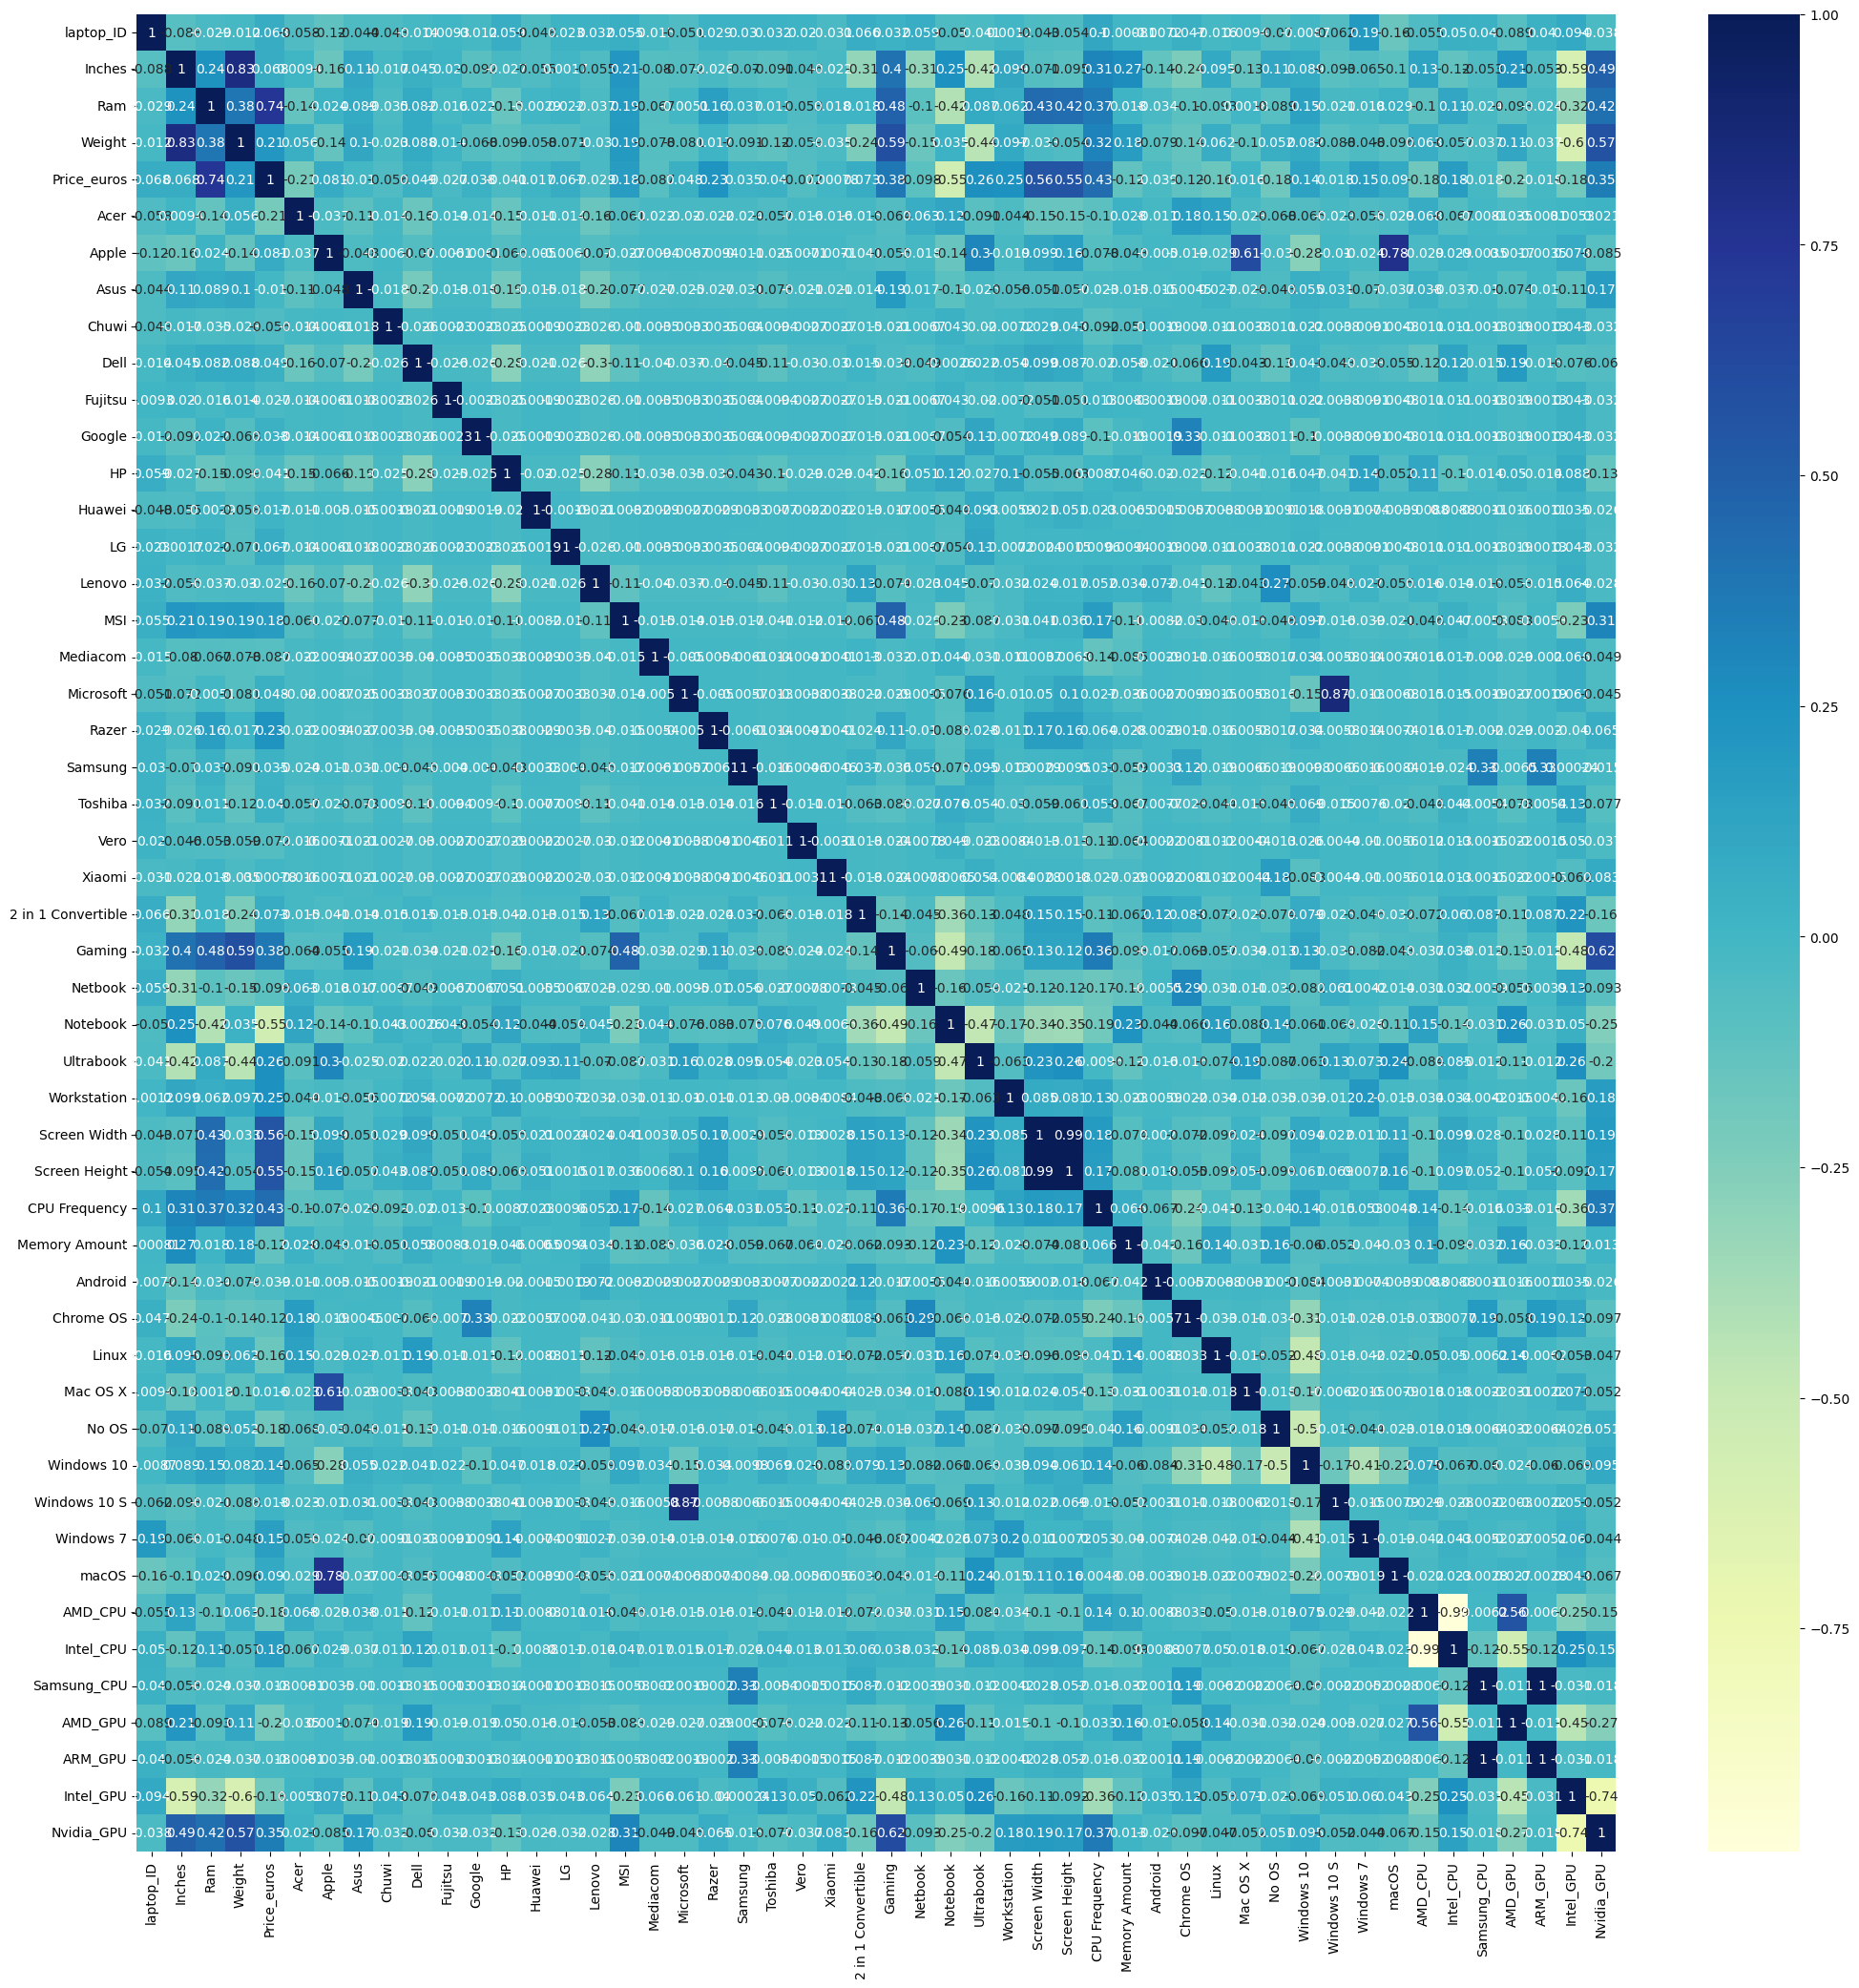

In [106]:
plt.figure(figsize=(25,25))
sns.heatmap(df.drop("Memory Type", axis=1).corr(), annot=True, cmap="YlGnBu")

In [110]:
target_correlations = df.drop("Memory Type", axis=1).corr()['Price_euros'].apply(abs).sort_values()

In [112]:
target_correlations

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_GPU               0.018431
Samsung_CPU           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS                 0.177094
MSI     

In [115]:
selected_features = target_correlations[-21:].index # onli more than 0.15

In [116]:
selected_features

Index(['Windows 7', 'Linux', 'No OS', 'MSI', 'AMD_CPU', 'Intel_CPU',
       'Intel_GPU', 'AMD_GPU', 'Acer', 'Weight', 'Razer', 'Workstation',
       'Ultrabook', 'Nvidia_GPU', 'Gaming', 'CPU Frequency', 'Notebook',
       'Screen Height', 'Screen Width', 'Ram', 'Price_euros'],
      dtype='object')

In [117]:
limited_df = df[selected_features]

<Axes: >

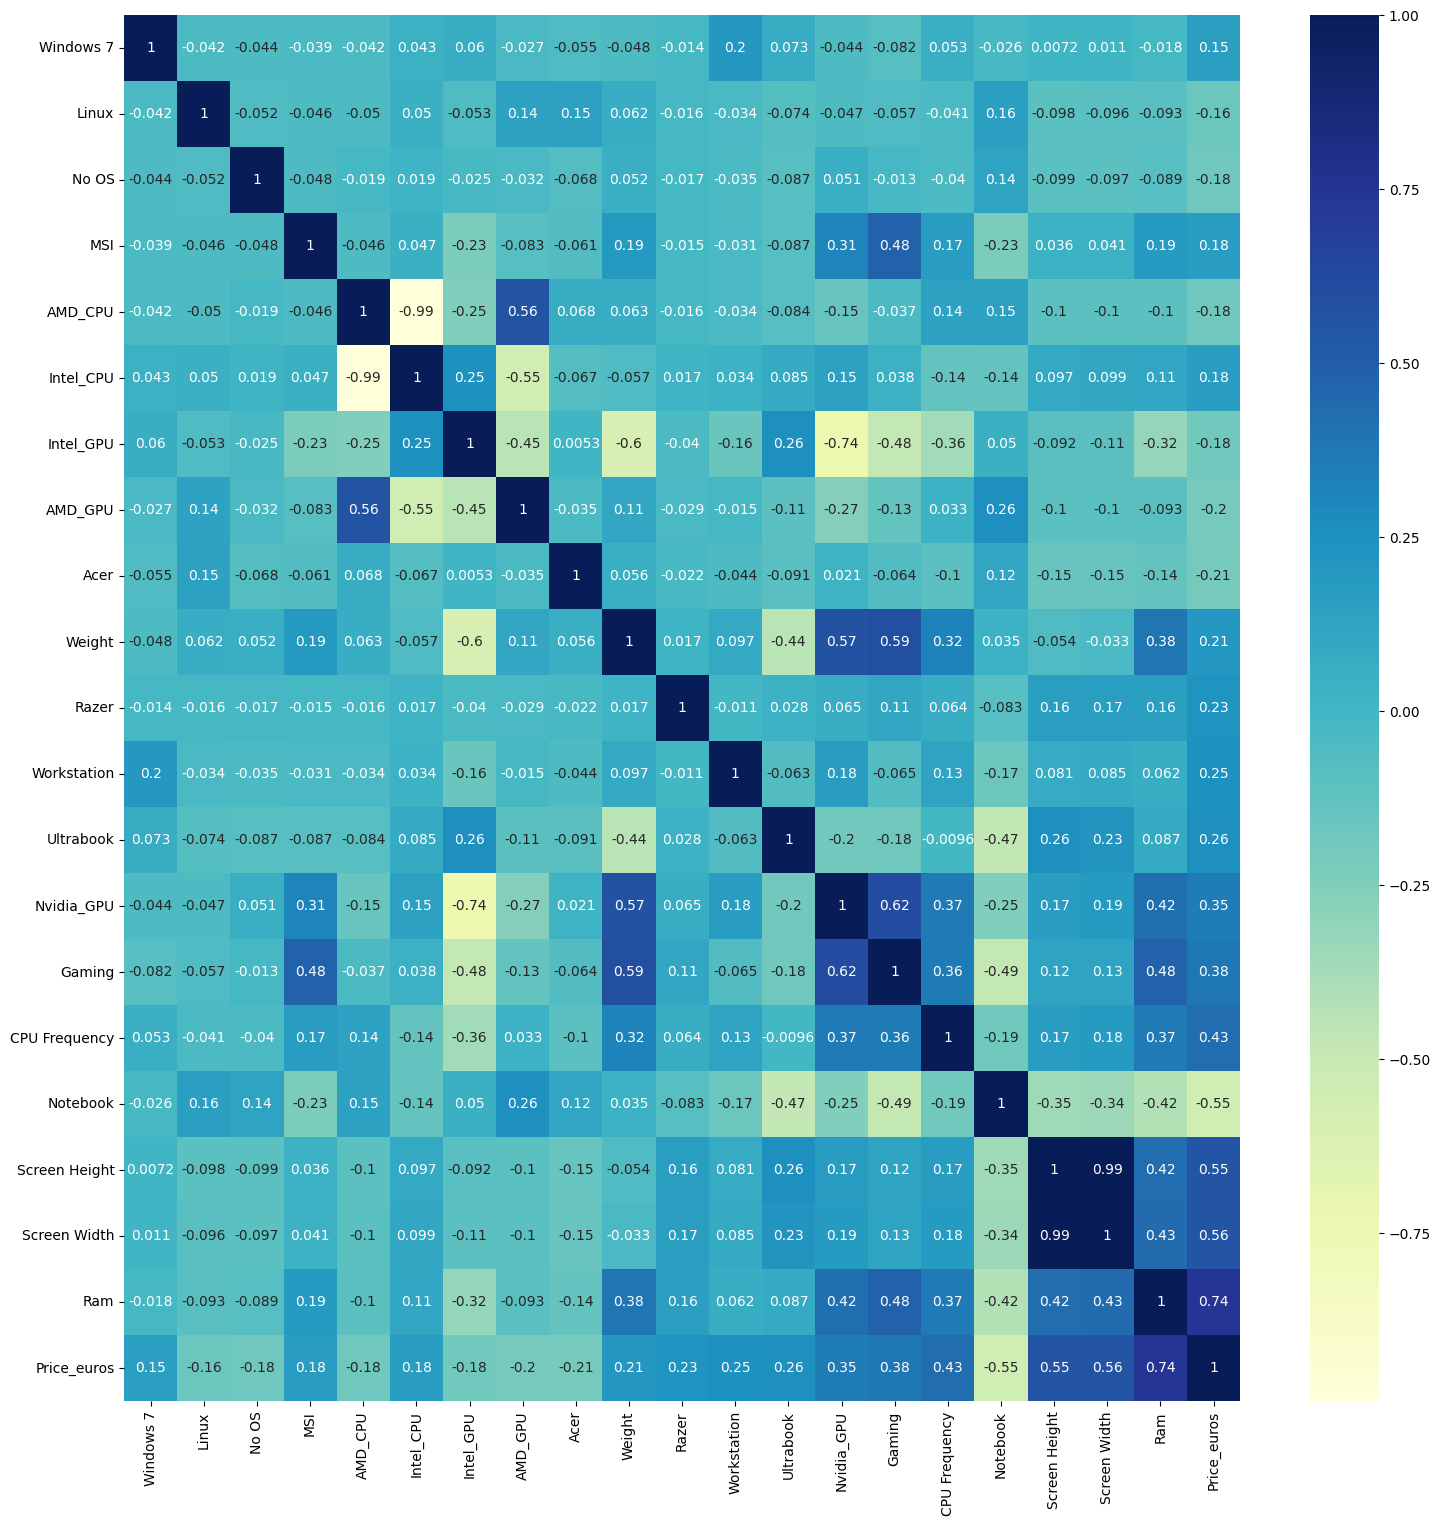

In [120]:
plt.figure(figsize=(18,18))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [122]:
X,y = limited_df.drop("Price_euros",axis=1), limited_df['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [123]:
scaler = StandardScaler()

In [125]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
forest = RandomForestRegressor()

In [127]:
forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [128]:
forest.score(X_test_scaled, y_test)

0.8026260498343614

In [129]:
y_pred = forest.predict(X_test_scaled)

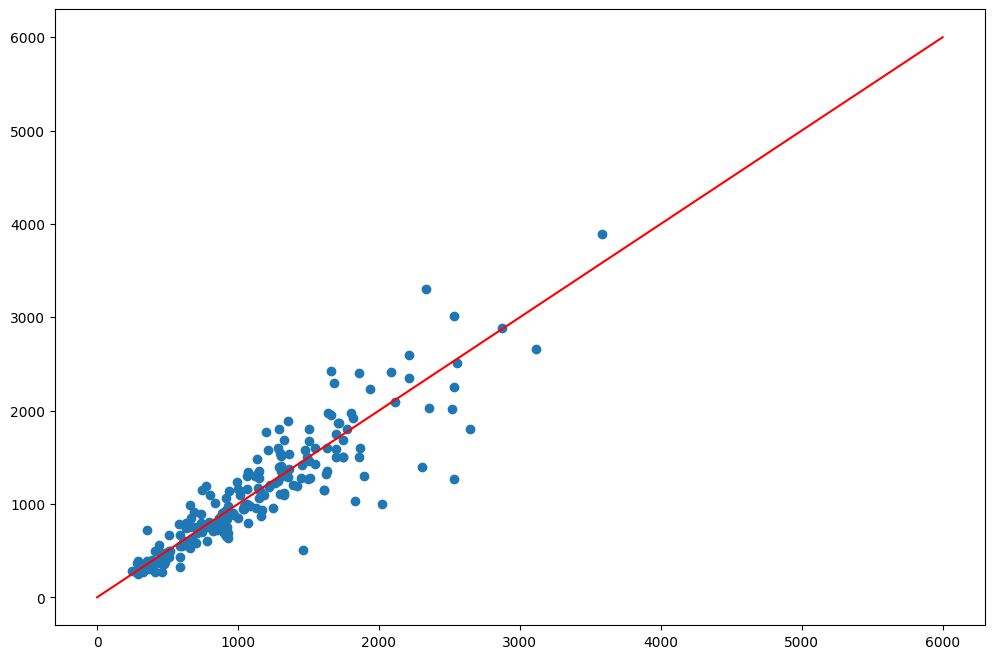

In [130]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000),range(0,6000), c='red')

In [131]:
X_test.iloc[0]

Windows 7        False
Linux            False
No OS            False
MSI              False
AMD_CPU          False
Intel_CPU         True
Intel_GPU         True
AMD_GPU          False
Acer             False
Weight            1.44
Razer            False
Workstation      False
Ultrabook        False
Nvidia_GPU       False
Gaming           False
CPU Frequency      1.6
Notebook          True
Screen Height      768
Screen Width      1366
Ram                  2
Name: 346, dtype: object

In [132]:
y_test.iloc[0]

279.0

In [134]:
X_new_scaled = scaler.transform([X_test.iloc[0]])

C:\Users\Korisnik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [139]:
forest.predict(X_test_scaled)[0]

248.69